# **Imports and downloads**

In [ ]:
import itertools
import pandas as pd
import numpy as np
import re
import os
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.models import Word2Vec
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from nltk.corpus.reader.wordnet import NOUN, VERB, ADJ, ADV
from nltk.corpus import reuters
from scipy.spatial.distance import cosine, euclidean


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('reuters')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package reuters to /root/nltk_data...


True

# **Loading data and preprocessing**

In [ ]:
texts = [reuters.raw(fileid) for fileid in reuters.fileids()]

In [ ]:
len(texts)

10788

In [ ]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return ADJ
    elif tag.startswith('V'):
        return VERB
    elif tag.startswith('N'):
        return NOUN
    elif tag.startswith('R'):
        return ADV
    else:
        return NOUN

def process_text(texts):
  corpus_text = 'n'.join(texts[:1000])
  corpus_text = corpus_text.lower()

  processed_text = []
  lemmatizer = WordNetLemmatizer()
  stop_words = set(stopwords.words('english'))

  for sent in sent_tokenize(corpus_text):
    sent = re.sub(r'[^a-zA-Z\s]', '', sent)  # remove any non alphabetic symbols
    sent = re.sub(r'\s+', ' ', sent).strip()  # remove extra spaces

    if sent == '':
      continue

    tmp = []
    for word, tag in nltk.pos_tag(word_tokenize(sent)):
        if word.lower() not in stop_words:
            # Get POS tag and lemmatize
            pos = get_wordnet_pos(tag)
            tmp.append(lemmatizer.lemmatize(word, pos))
    processed_text.append(tmp)

  return processed_text

In [ ]:
processed_texts = process_text(texts)
processed_texts


[['asian',
  'exporter',
  'fear',
  'damage',
  'usjapan',
  'rift',
  'mount',
  'trade',
  'friction',
  'u',
  'japan',
  'raise',
  'fear',
  'among',
  'many',
  'asias',
  'export',
  'nation',
  'row',
  'could',
  'inflict',
  'farreaching',
  'economic',
  'damage',
  'businessmen',
  'official',
  'say'],
 ['tell',
  'reuter',
  'correspondent',
  'asian',
  'capital',
  'u',
  'move',
  'japan',
  'might',
  'boost',
  'protectionist',
  'sentiment',
  'u',
  'lead',
  'curb',
  'american',
  'import',
  'product'],
 ['exporter',
  'say',
  'conflict',
  'would',
  'hurt',
  'longrun',
  'shortterm',
  'tokyos',
  'loss',
  'might',
  'gain'],
 ['u',
  'say',
  'impose',
  'mln',
  'dlrs',
  'tariff',
  'import',
  'japanese',
  'electronics',
  'good',
  'april',
  'retaliation',
  'japan',
  'allege',
  'failure',
  'stick',
  'pact',
  'sell',
  'semiconductor',
  'world',
  'market',
  'cost'],
 ['unofficial',
  'japanese',
  'estimate',
  'put',
  'impact',
  'tariff',

# **Word2Vec and word embeddings**

In [ ]:
model = Word2Vec(sentences=processed_texts, vector_size=300, window=5, min_count=1, workers=4)

In [ ]:
model.wv.save_word2vec_format('word2vec_embeddings.txt', binary=False)

In [ ]:
word_vectors = model.wv
word_embeddings = {word: word_vectors[word] for word, index in word_vectors.key_to_index.items()}



In [ ]:
for word, embedding in word_embeddings.items():
    print(f"Word: {word}, Embedding: {embedding[:5]}...")


Streaming output truncated to the last 5000 lines.
Word: gghf, Embedding: [-0.00113145  0.02469978  0.0053403   0.01276457  0.00172638]...
Word: auto, Embedding: [0.00289565 0.02097513 0.00424125 0.00746985 0.00089144]...
Word: holt, Embedding: [0.00032321 0.03487992 0.00951447 0.01875728 0.00650948]...
Word: rinehart, Embedding: [0.00087224 0.03774503 0.00547541 0.0192542  0.00254466]...
Word: brace, Embedding: [-0.00079993  0.03017575  0.00697341  0.0150924   0.00130934]...
Word: jovanovich, Embedding: [-0.00071196  0.0262503   0.00727765  0.01112904  0.00523062]...
Word: publishing, Embedding: [0.00125575 0.0155165  0.00132134 0.00943504 0.00389517]...
Word: ltcbs, Embedding: [0.0014615  0.01244473 0.00214428 0.00738401 0.00432732]...
Word: attractive, Embedding: [0.00081888 0.01611853 0.0042727  0.00778046 0.00369606]...
Word: candidate, Embedding: [0.00367382 0.01883412 0.00541528 0.00739334 0.00371663]...
Word: true, Embedding: [0.003373   0.01874444 0.00346619 0.00813016 0.00563

# **Task 2**

In [ ]:

doc1 = ["Healthcare focuses on patients, using technology like telemedicine."]


doc2 = ["Virtual healthcare is growing, improving access for patients."]

doc3 = ["Scientists study physics and AI to solve problems."]

doc4 = ["The dog loves playing with cats every day."]



In [ ]:
doc1_pre = process_text(doc1)
doc2_pre = process_text(doc2)
doc3_pre = process_text(doc3)
doc4_pre = process_text(doc4)


In [ ]:
doc1_embedding = np.mean([word_embeddings[word] for l in range(len(doc1_pre)) for word in doc1_pre[l] if word in word_embeddings.keys()], axis=0)
doc2_embedding = np.mean([word_embeddings[word] for l in range(len(doc2_pre)) for word in doc2_pre[l] if word in word_embeddings.keys()], axis=0)
doc3_embedding = np.mean([word_embeddings[word] for l in range(len(doc3_pre)) for word in doc3_pre[l] if word in word_embeddings.keys()], axis=0)
doc4_embedding = np.mean([word_embeddings[word] for l in range(len(doc4_pre)) for word in doc4_pre[l] if word in word_embeddings.keys()], axis=0)

doc1_pre = [element for innerList in doc1_pre for element in innerList]
doc2_pre = [element for innerList in doc2_pre for element in innerList]
doc3_pre = [element for innerList in doc3_pre for element in innerList]
doc4_pre = [element for innerList in doc4_pre for element in innerList]

docs_pre = [doc1_pre , doc2_pre, doc3_pre, doc4_pre]
docs = [doc1_embedding, doc2_embedding, doc3_embedding, doc4_embedding]

In [ ]:
n = len(docs)


cosine_matrix = np.zeros((n, n))
jaccard_matrix = np.zeros((n, n))
euclidean_matrix = np.zeros((n, n))

def jaccard_similarity(vec1, vec2):
    return len(set(vec1).intersection(vec2)) / len(set(vec1).union(vec2))


for i in range(n):
    for j in range(n):

        cosine_matrix[i, j] = np.round(1 - cosine(docs[i], docs[j]), 5)


        jaccard_matrix[i, j] = np.round(jaccard_similarity(docs_pre[i], docs_pre[j]), 5)


        euclidean_matrix[i, j] = np.round(euclidean(docs[i], docs[j]), 5)


print("Cosine Similarity Matrix:")
print(cosine_matrix)

print("\nJaccard Similarity Matrix:")
print(jaccard_matrix)

print("\nEuclidean Distance Matrix:")
print(euclidean_matrix)

Cosine Similarity Matrix:
[[1.      0.9974  0.99714 0.99048]
 [0.9974  1.      0.99967 0.99327]
 [0.99714 0.99967 1.      0.99193]
 [0.99048 0.99327 0.99193 1.     ]]

Jaccard Similarity Matrix:
[[1.      0.18182 0.      0.     ]
 [0.18182 1.      0.      0.     ]
 [0.      0.      1.      0.     ]
 [0.      0.      0.      1.     ]]

Euclidean Distance Matrix:
[[0.      0.94915 1.01602 0.82857]
 [0.94915 0.      0.07262 0.19894]
 [1.01602 0.07262 0.      0.25659]
 [0.82857 0.19894 0.25659 0.     ]]


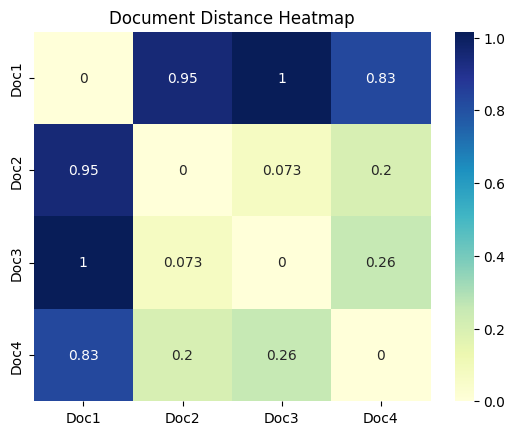

In [ ]:
sns.heatmap(euclidean_matrix, annot=True, cmap='YlGnBu', xticklabels=["Doc1", "Doc2" , "Doc3" , "Doc4"], yticklabels=["Doc1", "Doc2" , "Doc3" , "Doc4"])
plt.title("Document Distance Heatmap")
plt.show()

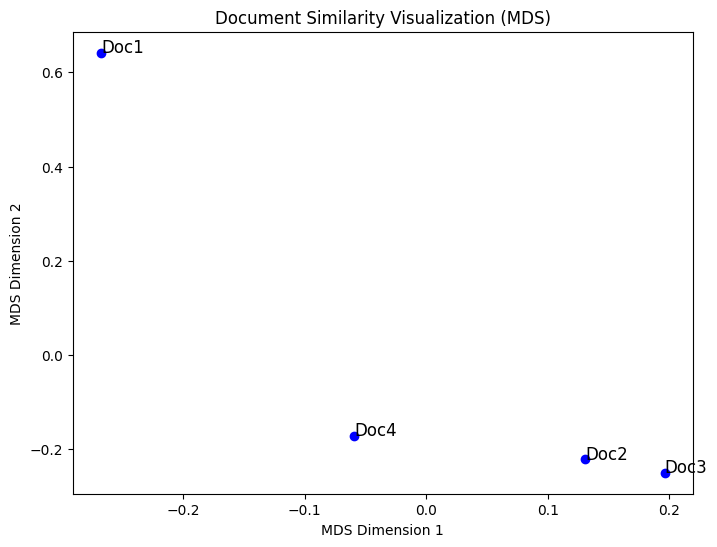

In [ ]:
from sklearn.manifold import MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
mds_results = mds.fit_transform(euclidean_matrix)
plt.figure(figsize=(8, 6))
plt.scatter(mds_results[:, 0], mds_results[:, 1], c='blue', marker='o')
for i, label in enumerate(["Doc1", "Doc2", "Doc3" , "Doc4"]):
    plt.text(mds_results[i, 0], mds_results[i, 1], label, fontsize=12)
plt.title("Document Similarity Visualization (MDS)")
plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.show()